In [1]:
# Application initialization
import mercury as mr

show_code = mr.Checkbox(value=False, label="Show code", url_key="show_code")

app = mr.App(
    title="cGAN Forecasts Visualization",
    description="Visualizing cGAN Forecasts",
    show_code=show_code.value,
)

mercury.Checkbox

mercury.App

In [2]:
from datetime import datetime
from cgan_ui.utils import get_forecast_data_dates, print_forecast_info

data_dates = get_forecast_data_dates(source="cgan")

cgan_date = mr.Select(
    choices=data_dates,
    value=data_dates[0],
    label="Forecast Initialization Date",
    url_key="cgan_date",
)

print_forecast_info(datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"))

mercury.Select

Forecast average: 2024-04-21 06:00:00 - 2024-04-22 06:00:00
Forecast initialisation: 2024-04-20 00:00:00



In [3]:
from cgan_ui.utils import get_data_store_path
from cgan_ui.show_cgan import load_GAN_forecast, plot_GAN_forecast, plot_GAN_ensemble

store_path = get_data_store_path()

# Load the GAN forecast
data = load_GAN_forecast(
    datetime.strptime(cgan_date.value.lower(), "%b %d, %Y"),
    store_path / "GAN_forecasts",
)

mercury.Select

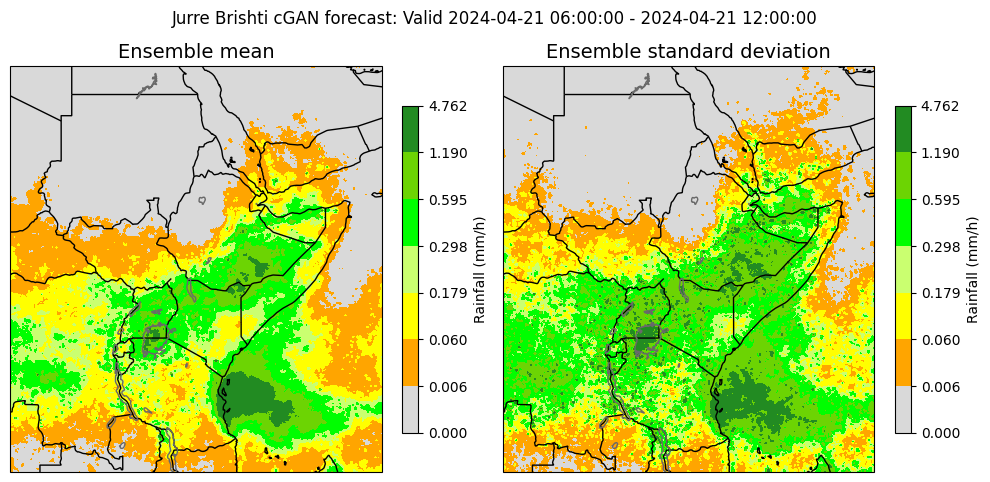

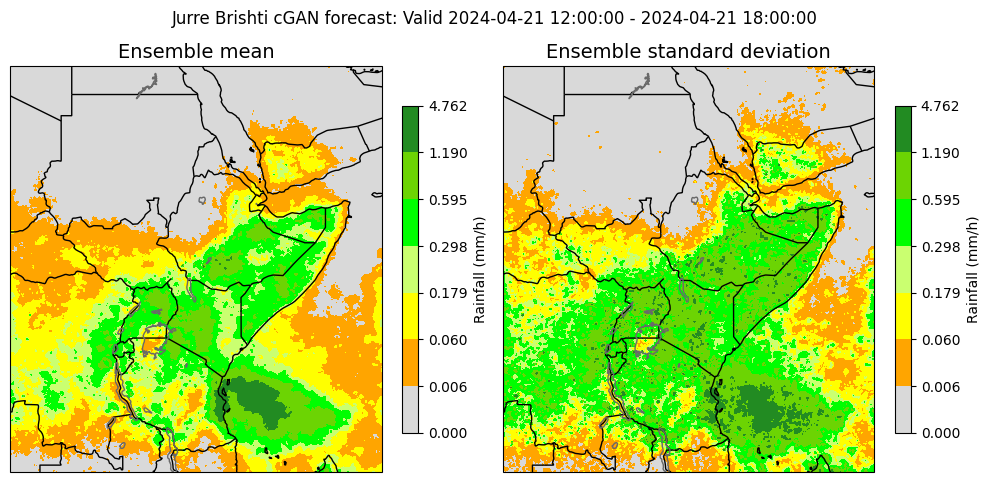

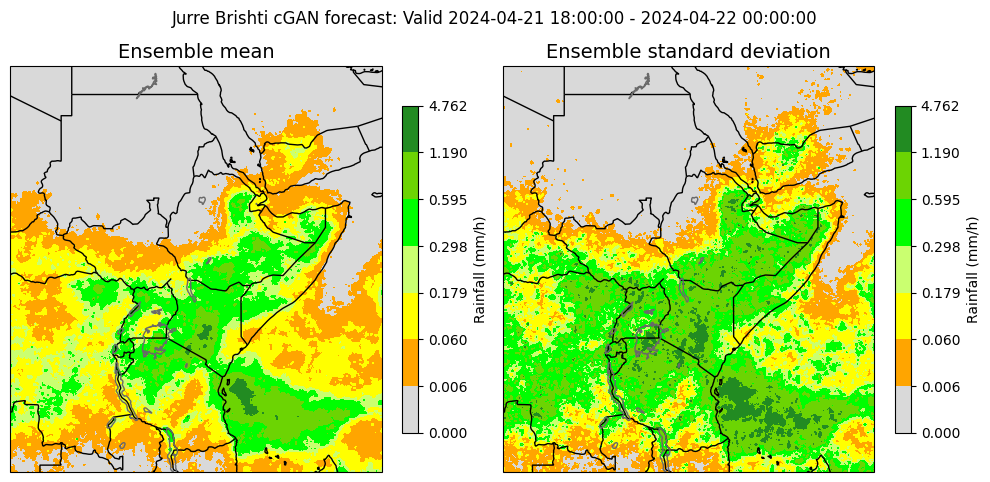

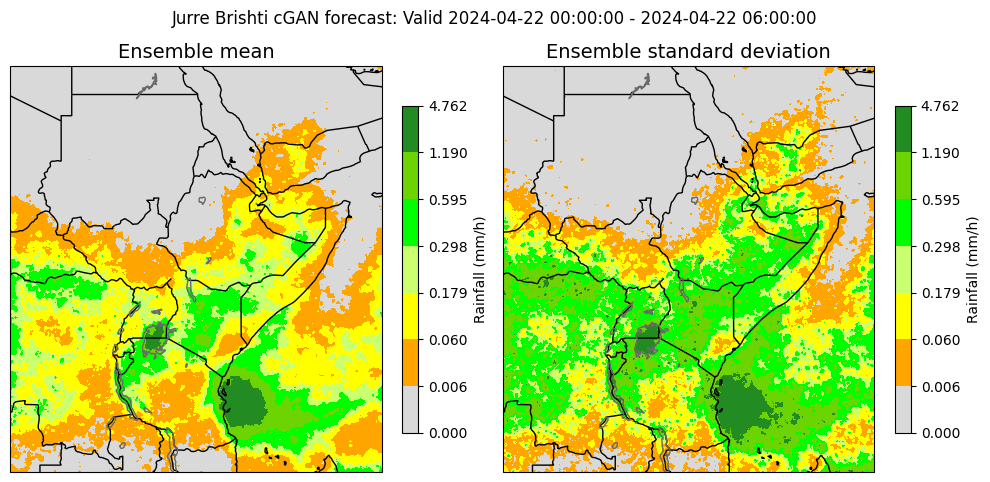

In [4]:
color_schemes = ["ICPAC", "ICPAC_heavy", "KMD", "EMI", "EMI_heavy", "Default"]
color_style = mr.Select(
    choices=color_schemes,
    value=color_schemes[0],
    label="Visualization Color Style",
    url_key="color_style",
)

# Plot the GAN forecast
plot_GAN_forecast(
    data, style=None if color_style.value == "Default" else color_style.value
)

In [5]:
show_ensemble = mr.Checkbox(
    value=False,
    label="Visualize Ensemble Members",
    url_key="show_ensemble",
)

if show_ensemble.value:
    # Plot the full ensemble
    plot_GAN_ensemble(
        data,
        valid_time_start_hour=12,
        style=None if color_style.value == "Default" else color_style.value,
        plot_units="mm/day",
    )

mercury.Checkbox